# Analysing Global Protests and Democracy since 1990

## Introduction
This project will explore two datasets related to protest and democracy. The first is the Mass Mobilization Data project, an initiative led by Clark and Regan (2021) and sponsored by the Political Instability Task Force. The dataset covers 162 countries from 1990 to March 2020, documenting various aspects of protest events, including protester demands, government responses, protest locations, and protester identities.

The second dataset is the Varieties of Democracy (V-Dem) dataset (2024), developed by the V-Dem Institute in Gothenburg. As stated on its website, the V-Dem dataset distinguishes between five high-level principles of democracy: electoral, liberal, participatory, deliberative, and egalitarian, collecting data to measure each of these principles. Although the V-Dem dataset covers a much broader time span, we will focus on the same period (1990-2019) as the Mass Mobilization dataset to ensure accurate comparisons.

By combining information from these two distinct datasets, this project provides a rich, multidimensional perspective on mass mobilization and socio-political conditions. It serves as a valuable resource for analyzing trends, identifying patterns, and exploring correlations between protests and various socio-economic and political factors.

## Importing Libraries
****
To begin, we'll start by importing the essential libraries that will support the different tasks in this project. These libraries will help us with data manipulation, analysis, and visualization. For instance, we will use pandas for handling datasets, matplotlib and seaborn for data visualization, and numpy for numerical operations. By importing these libraries at the start, we ensure that we have the necessary tools to explore, analyse, and visualise the data efficiently.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Set 1: Mass Mobilisation
I'll now read in the first data set I want to examine, mass mobilisation. We will read this from a CSV file, which can be found in the 'data' folder of the project directory.

In [67]:
massmob_path = "data/massmobilisation.csv"
massmob_df = pd.read_csv(massmob_path)

# We'll use Boolean Indexing to clean up the data (source: https://www.geeksforgeeks.org/boolean-indexing-in-pandas/).
# I want to remove all rows where the protest column is marked 'O'. I also want to remove the data from 2020, since it only goes up to March and does not offer an accurate depiction. Besides this, Covid-19 will have meant opportunities for protest would be limited, and this would thus skew our data.
massmob_mask = (massmob_df['protest'] != 0) & (massmob_df['year'] != 2020)
massmob_df = massmob_df[massmob_mask]

print(massmob_df.head())

          id country  ccode  year         region  protest  protestnumber  \
0  201990001  Canada     20  1990  North America        1              1   
1  201990002  Canada     20  1990  North America        1              2   
2  201990003  Canada     20  1990  North America        1              3   
3  201990004  Canada     20  1990  North America        1              4   
4  201990005  Canada     20  1990  North America        1              5   

   startday  startmonth  startyear  ...  protesterdemand4   stateresponse1  \
0      15.0         1.0     1990.0  ...               NaN           ignore   
1      25.0         6.0     1990.0  ...               NaN           ignore   
2       1.0         7.0     1990.0  ...               NaN           ignore   
3      12.0         7.0     1990.0  ...               NaN     accomodation   
4      14.0         8.0     1990.0  ...               NaN  crowd dispersal   

   stateresponse2  stateresponse3 stateresponse4 stateresponse5  \
0      

## Global Protests per Year (1990-2019)
***
The first data point I'll examine is the number of protests globally per year, from 1990 to 2019. This will allow us to identify trends and fluctuations in protest activity over time, potentially shedding light on political, social, and economic factors influencing global mobilisation.

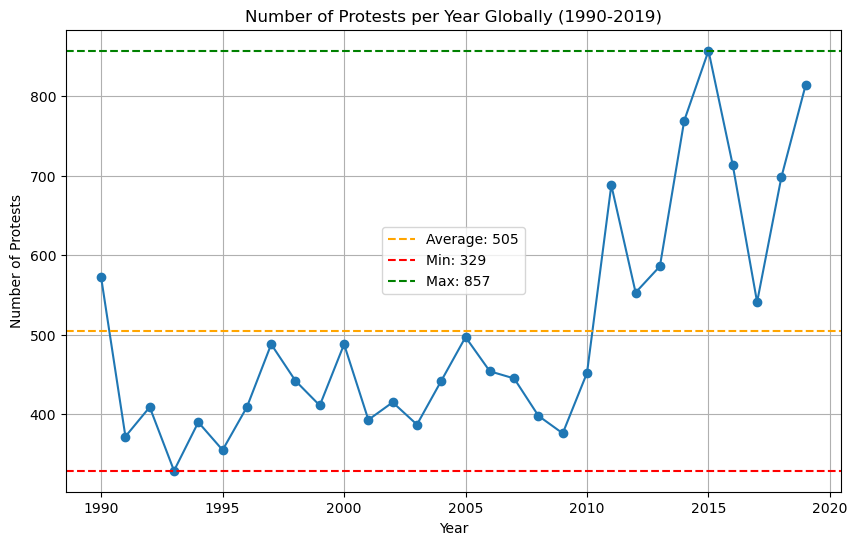

In [ ]:
# We'll start by grouping the data by year (Source: https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/).
yeargrouped = massmob_df.groupby('year')
# We then want to get the number of protests for each group by counting the rows.
protests_per_year = yeargrouped.size().reset_index(name='num_protests')
# .size() returns the number of rows in a Pandas series; this places the year as the index, so in order to carry out essential pandas operations later, we need to use .reset_index to transform the series into a Data Frame, with columns for year and number of protests. (Source: https://favtutor.com/articles/convert-pandas-series-to-dataframe/).

plt.figure(figsize=(10, 6))
plt.plot(protests_per_year['year'], protests_per_year['num_protests'], marker='o')
plt.title('Number of Protests per Year Globally (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')

avgyearlyprotests = protests_per_year['num_protests'].mean()
minyearlyprotests = protests_per_year['num_protests'].min()
maxyearlyprotests = protests_per_year['num_protests'].max()

plt.axhline(y=avgyearlyprotests, color='orange', linestyle='--', label=f'Average: {avgyearlyprotests:.0f}') # added ":.0f" because a fraction of a protest doesn't make much sense (source: https://www.datacamp.com/tutorial/python-round-to-two-decimal-places)
plt.axhline(y=minyearlyprotests, color='red', linestyle='--', label=f'Min: {minyearlyprotests}')
plt.axhline(y=maxyearlyprotests, color='green', linestyle='--', label=f'Max: {maxyearlyprotests}')

plt.grid()
plt.legend()
plt.show()



The plot above shows that the 1990s and 2000s experienced relatively low levels of global sociopolitical movements. However, the 2010s saw a sharp increase in protests, aligning with key events such as the Arab Spring, the ongoing economic fallout from the 2008 global recession, and a rise in climate-related demonstrations. This surge was further amplified by the growing use of social media, which allowed protest information to spread rapidly and reach a broader audience.

Among these three decades, 1993 recorded the fewest protests, with just 329 events, while 2015 stands out as a peak year, with 857 global protests. From 1990 to 2019, the average number of protests per year was 505. However, this average is skewed by the intense activity of the 2010s, as protest numbers only exceeded this average once before 2011. Notably, that exception was 1990, a year marked by the dissolution of the USSR and the fall of communism in Europe, events which spurred widespread protests and uprisings.

## Reasons for Protest (1990-2019)
Having explored the overall trends in protest numbers over the past few decades, we now shift our focus to the core reasons behind these protests. By analysing the main categories of demands made by protesters, we can gain insight into the specific socio-political issues driving mass mobilisation. To visualize this, we’ll use a pie chart.

              protesterdemand1  num_protests
0           labor wage dispute          1704
1              land farm issue           466
2             police brutality           817
3  political behavior, process          9614
4  price increases, tax policy          1086
5        removal of politician          1004
6          social restrictions           451


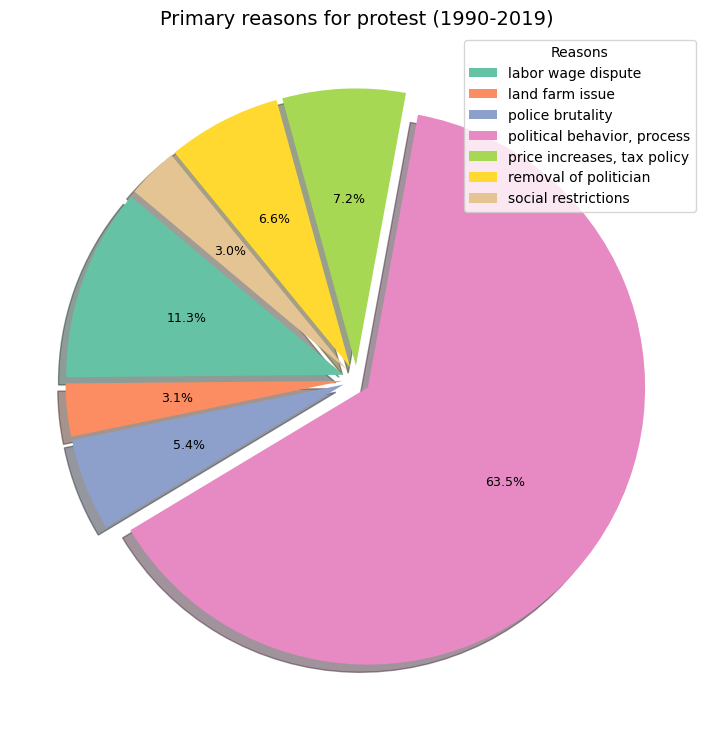

In [68]:
reasongrouped = massmob_df.groupby('protesterdemand1')
protests_by_reason = reasongrouped.size().reset_index(name='num_protests')
print(protests_by_reason)

# To remind myself of how best to plot pie charts, I used the Matplotlib documentation (source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html)
plt.figure(figsize=(15, 9))
wedges, texts, autotexts = plt.pie(
    protests_by_reason['num_protests'], 
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 9},
    colors=sns.color_palette('Set2'),
    shadow = True,
    explode=[0.05] * len(protests_by_reason)
    ) # Customisation ideas such as Seaborn's colour palette and 'explode' were taken from Proclus Academy (source: https://proclusacademy.com/blog/customize_matplotlib_piechart/)

plt.title('Primary reasons for protest (1990-2019)', fontsize=14)
plt.legend(wedges, protests_by_reason['protesterdemand1'], title="Reasons", fontsize=10)
plt.show()

Interestingly, political behavior and processes have dominated the reasoning behind protests over the past three decades, accounting for 63.5% of all protests. Among other reasons, 'Labour/wage disputes' stands out as the only category surpassing 10%, with 'price increases/tax policy' and 'removal of a politician' following closely behind.

## Protests by Region (1990-2019)
Now, let's examine how these protests were distributed across different regions of the world. By analysing regional trends, we can gain insight into which areas experienced the most significant levels of mass mobilisation during this period.

            region  num_protests
0           Africa          3164
1             Asia          3099
2  Central America           451
3           Europe          4964
4             MENA          1251
5    North America           520
6          Oceania            38
7    South America          1656


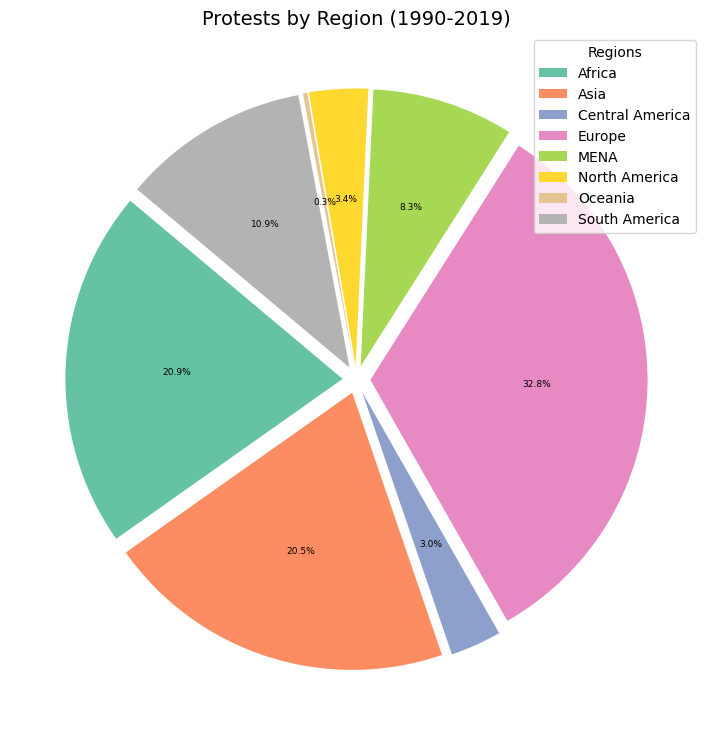

In [70]:
regiongrouped = massmob_df.groupby('region')
protests_per_region = regiongrouped.size().reset_index(name='num_protests')
print(protests_per_region)


plt.figure(figsize=(15, 9))
wedges, texts, autotexts = plt.pie(
    protests_per_region['num_protests'], 
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 6.5},
    colors=sns.color_palette('Set2'),
    explode=[0.05] * len(protests_per_region)
)
plt.title('Protests by Region (1990-2019)', fontsize=14) 
plt.legend(wedges, protests_per_region['region'], title="Regions", fontsize=10)
plt.show()


As we can see above, Europe had the highest proportion of the protests recorded in these 3 decades (32.8%), followed respectively by Africa and Asia (20.9% and 20.5%), with a sizeable proportion also in South America and MENA (Middle East & North Africa).

If we look closer at the data for Europe, we can see which countries were most mobilised. 

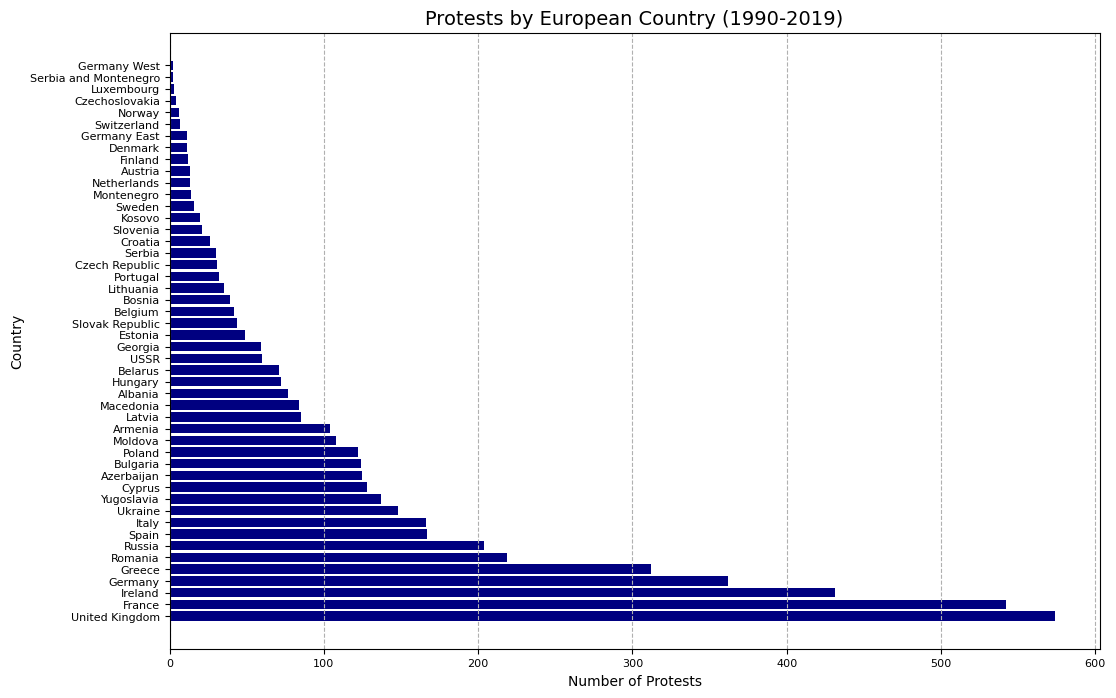

In [77]:
# To do this, I'll filter the data set for just Europe, then group by country.
massmob_df_eu = massmob_df[massmob_df['region'] == 'Europe']
europegrouped = massmob_df_eu.groupby('country')
protests_per_country_eu = europegrouped.size().reset_index(name='num_protests')

# I then sort the data by the number of protests for better visualization (Source: https://www.datacamp.com/tutorial/pandas-sort-values?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156376311&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=726015683493&utm_targetid=dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9197253&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-jan25&gad_source=1&gclid=CjwKCAiA7Y28BhAnEiwAAdOJUGLgHgAAxvWLYXa8VglE5eQeU_Aek6ssoVyr3tnttGscpmGmLSAicBoC56sQAvD_BwE)
protests_per_country_eu = protests_per_country_eu.sort_values(by='num_protests', ascending=False)

# Since the number of countries is quite large, it may be better to show this as a horizontal bar chart rather than a pie chart.
plt.figure(figsize=(12, 8))
plt.barh(protests_per_country_eu['country'], protests_per_country_eu['num_protests'], color='navy')
plt.title('Protests by European Country (1990-2019)', fontsize=14)
plt.xlabel('Number of Protests', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.grid(axis='x', linestyle='--') # Information on customising the grid sought from ChatGPT
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


The data above reveals some intriguing insights.

Firstly, it’s noteworthy that several countries listed no longer exist, such as West Germany, Czechoslovakia, the USSR, and Yugoslavia, among others. A deeper analysis could involve reassigning the data from these nations to their successor states. However, this approach poses challenges, especially for countries like Yugoslavia, which fragmented into seven successor nations.

Secondly, one might expect the number of protests to generally align with a country’s population size. This is evident to some extent, as nations like the United Kingdom, France, and Germany feature prominently at the top of the list. Yet, there are notable outliers, such as Ireland, which ranks third in protest numbers during this period despite having a much smaller population compared to countries like Germany.

Let’s now narrow our focus to Ireland to explore potential trends in greater detail.

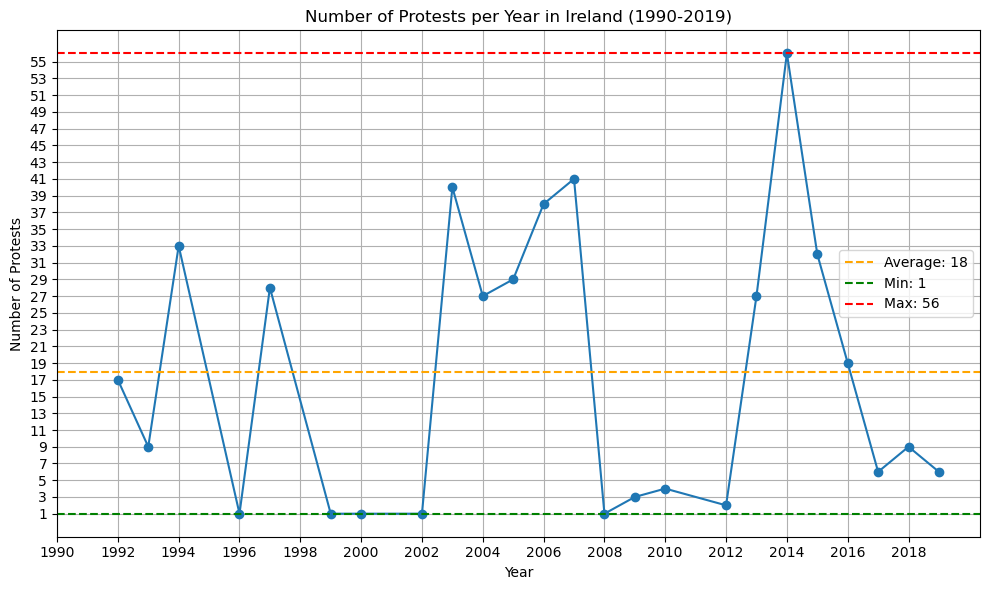

In [79]:
massmob_ie = massmob_df[massmob_df['country'] == 'Ireland']
yeargrouped_ie = massmob_ie.groupby('year')
protests_per_year_ie = yeargrouped_ie.size().reset_index(name='num_protests')

avg_ie = protests_per_year_ie['num_protests'].mean()
min_ie = protests_per_year_ie['num_protests'].min()
max_ie = protests_per_year_ie['num_protests'].max()

plt.figure(figsize=(10, 6))
plt.plot(protests_per_year_ie['year'], protests_per_year_ie['num_protests'], marker='o')
plt.title('Number of Protests per Year in Ireland (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')

y_ticks = range(1, int(max_ie) + 1, 2) # I didn't feel the ticks generated automatically were optimal, so I customised this (source: https://www.geeksforgeeks.org/change-the-x-or-y-ticks-of-a-matplotlib-figure/).
plt.yticks(y_ticks)
x_ticks = range(1990, 2019, 2)
plt.xticks(x_ticks)

plt.axhline(y=avg_ie, color='orange', linestyle='--', label=f'Average: {avg_ie:.0f}')
plt.axhline(y=min_ie, color='green', linestyle='--', label=f'Min: {min_ie}')
plt.axhline(y=max_ie, color='red', linestyle='--', label=f'Max: {max_ie}')

plt.grid()
plt.legend()
plt.tight_layout() # This is a handy feature that helps to avoid overlapping (source: https://www.kaggle.com/code/berkayalan/matplotlib-a-complete-data-visualization-guide)
plt.show()

Looking at the data, I'm interested to know what were the factors in play in 2014 that led to 56 protests taking place, more than double the previous year.

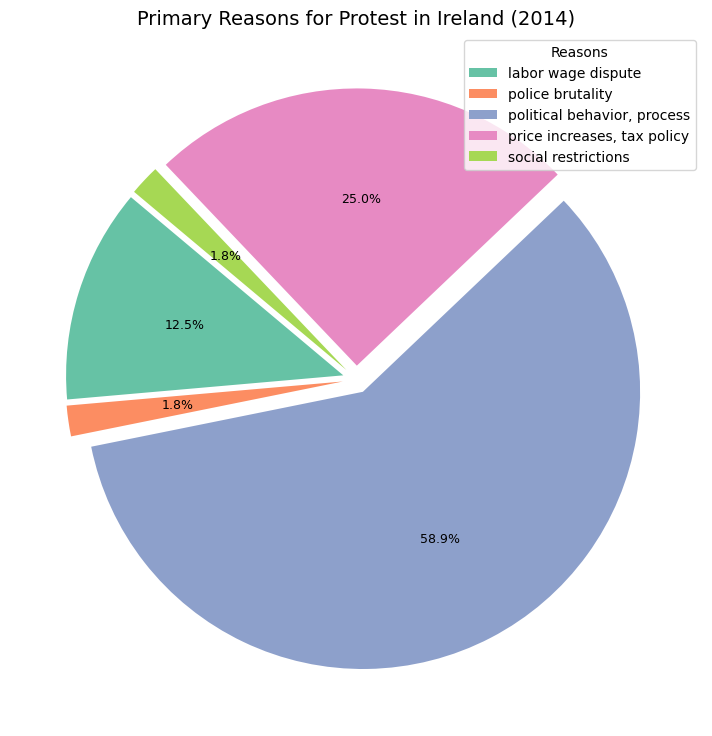

In [81]:
massmob_ie_2014 = massmob_ie[massmob_ie['year'] == 2014]
protestreasons_ie_2014 = massmob_ie_2014.groupby(['protesterdemand1']).size().reset_index(name='num_protests')

plt.figure(figsize=(15, 9))
wedges, texts, autotexts = plt.pie(
    protestreasons_ie_2014['num_protests'], 
    autopct='%1.1f%%',
     startangle=140,
    textprops={'fontsize': 9},
    colors=sns.color_palette('Set2'),
    explode=[0.05] * len(protestreasons_ie_2014)
)
plt.title('Primary Reasons for Protest in Ireland (2014)', fontsize=14)

plt.legend(wedges, protestreasons_ie_2014['protesterdemand1'], title="Reasons", fontsize=10)
plt.show()


## Data Set 2: V-Dem Scores

In [82]:
vdem_path = "/Users/myleshenehan/Downloads/Correct-pfda/pfda/project/data/v-dem.csv.gz"
vdem_df = pd.read_csv(vdem_path, compression='gzip') # after problems with Github's size limits, I decided to compress the csv.
vdem_df = vdem_df[(vdem_df['year'] >= 1990) & (vdem_df['year'] <= 2019)] # I only want to include the years that we also have in the Mass Mobilisation data set.
print(vdem_df.head())

/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_19582/1365883364.py:2: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem_df = pd.read_csv(vdem_path, compression='gzip') # after problems with Github's size limits, I decided to compress the csv.


    country_name country_text_id  country_id  year historical_date  project  \
201       Mexico             MEX           3  1990      1990-12-31        0   
202       Mexico             MEX           3  1991      1991-12-31        0   
203       Mexico             MEX           3  1992      1992-12-31        0   
204       Mexico             MEX           3  1993      1993-12-31        0   
205       Mexico             MEX           3  1994      1994-12-31        0   

     historical               histname  codingstart  codingend  ...  \
201           1  United Mexican States         1789       2023  ...   
202           1  United Mexican States         1789       2023  ...   
203           1  United Mexican States         1789       2023  ...   
204           1  United Mexican States         1789       2023  ...   
205           1  United Mexican States         1789       2023  ...   

     e_mipopula  e_miurbani  e_pefeliex    e_wb_pop  e_pechmor  e_miinteco  \
201   84913.650     

## Number of Protests vs Liberal Democracy Index (Ireland)
Given that dissatisfaction with political behavior and process was seen as the biggest factor in protests in Ireland in recent years, I would like to see the correlation between the number of protests and the level of Liberal Democracy.

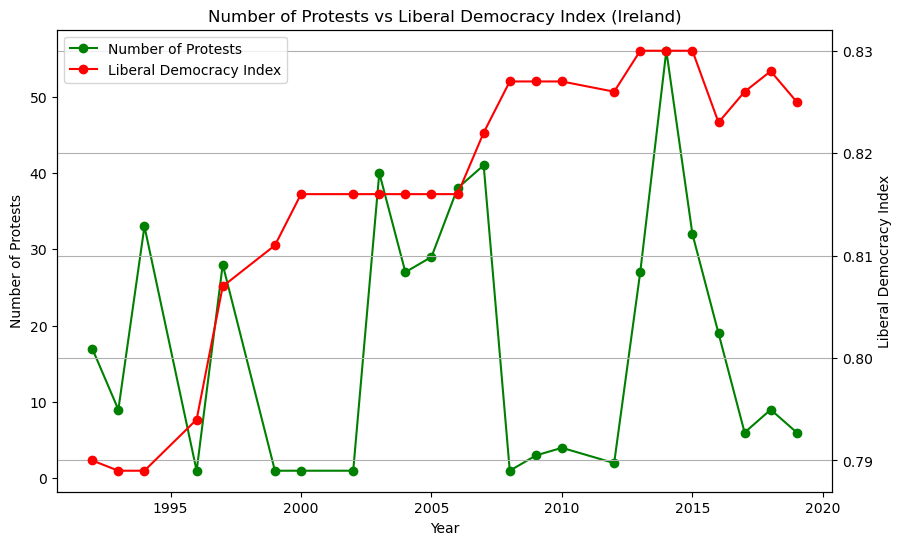

Pearson correlation coefficient: 0.05


In [97]:
vdem_ie = vdem_df[vdem_df['country_name'] == 'Ireland']
vdem_libdem_ie = vdem_ie[['year', 'v2x_libdem']]

# We want to merge the data set by the matching data point, year.
merged_df = pd.merge(protests_per_year_ie, vdem_libdem_ie, on='year')

#Since we'll have 2 y axes, the process for the plot is a little different. We'll need to treat each axis separately for now.
fig, ax1 = plt.subplots(figsize=(10, 6))

# Axis 1: Number of Protests
ax1.plot(
    merged_df['year'],
    merged_df['num_protests'],
    color='green',
    marker='o',
    label='Number of Protests'
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Protests', color='black')

# Axis 2: Liberal Democracy Index
ax2 = ax1.twinx() #.twinx() allows us to create a second y axis with the same x axis (source: https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/#:~:text=The%20first%20axis%20has%20a,twinx()%20.&text=As%20can%20be%20seen%20above,goes%20from%204%20to%2020).
ax2.plot(
    merged_df['year'],
    merged_df['v2x_libdem'],
    color='red',
    marker='o',
    label='Liberal Democracy Index'
)
ax2.set_ylabel('Liberal Democracy Index', color='black')

plt.title('Number of Protests vs Liberal Democracy Index (Ireland)')
plt.grid()

# Combine legends from both axes (source: ChatGPT. Query: "How can I combine legends for a plot where I have one x axis and two y axes?" )
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2)
plt.show()

correlation = merged_df['num_protests'].corr(merged_df['v2x_libdem'])
print(f"Pearson correlation coefficient: {correlation:.2f}")



Examining the Pearson correlation coefficient of +0.05, there appears to be little to no correlation between the number of protests and Ireland's Liberal Democracy Index. However, it is notable that the year with the highest number of protests coincides with the year Ireland achieved its highest Liberal Democracy Index score. This could suggest that during that period, citizens felt particularly empowered to push for change.

In a relatively stable country like Ireland, significant fluctuations in the Liberal Democracy Index are unlikely. To explore a more dynamic case, let’s turn to Turkey, a nation that has experienced considerable political turmoil over the past 30 years. Under President Erdoğan’s increasingly authoritarian rule over the past two decades, we would expect to see a sharp decline in Turkey’s Liberal Democracy Index. Let’s investigate how this shift has influenced the number of protests.


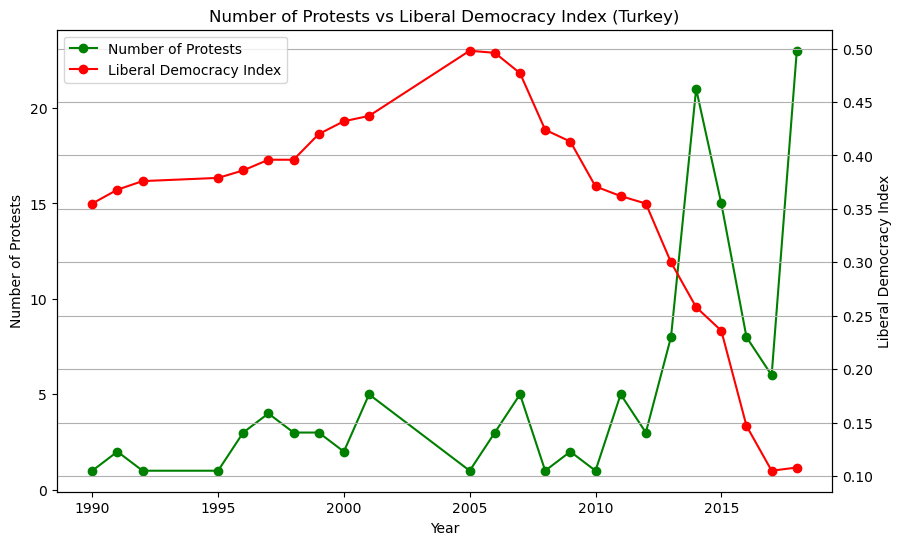

Pearson correlation coefficient: -0.68


In [101]:
massmob_tr = massmob_df[massmob_df['country'] == 'Turkey']
yeargrouped_tr = massmob_tr.groupby('year')
protests_per_year_tr = yeargrouped_tr.size().reset_index(name='num_protests')

vdem_tr = vdem_df[vdem_df['country_name'] == 'Türkiye'] # Luckily, I had already noticed the difference in naming conventions for Turkey/Türkiye between data sets, so I could adjust my code accordingly.
vdem_libdem_tr = vdem_tr[['year', 'v2x_libdem']]


merged_df = pd.merge(protests_per_year_tr, vdem_libdem_tr, on='year')

fig, ax1 = plt.subplots(figsize=(10, 6))

# Axis 1: Number of Protests
ax1.plot(
    merged_df['year'],
    merged_df['num_protests'],
    color='green',
    marker='o',
    label='Number of Protests'
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Protests', color='black')

# Axis 2: Libreral Democracy Index
ax2 = ax1.twinx()
ax2.plot(
    merged_df['year'],
    merged_df['v2x_libdem'],
    color='red',
    marker='o',
    label='Liberal Democracy Index'
)
ax2.set_ylabel('Liberal Democracy Index', color='black')

plt.title('Number of Protests vs Liberal Democracy Index (Turkey)')
plt.grid()

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left') # here, I had to specify the location of the legend because I noticed it overalpped with the data.
plt.show()

correlation = merged_df['num_protests'].corr(merged_df['v2x_libdem'])
print(f"Pearson correlation coefficient: {correlation:.2f}")

The data above reveals a relatively strong negative correlation between the number of protests and the level of liberal democracy in Turkey. In simpler terms, as Turkey has become less democratic, the number of protests has tended to increase. This trend suggests a public backlash against the erosion of the country's electoral and judicial institutions.

## Number of Protests vs Freedom of Expression


To finish, I plan to analyse the correlation between the number of protests in each country and its average Freedom of Expression score. To ensure a balanced and geographically diverse sample, I asked ChatGPT to provide a list of 20 countries with populations falling within a narrow range. The selected countries all have populations between 25 and 35 million, and they are distributed fairly evenly across different regions of the world.

In [102]:
samplecountries = ['Peru','Venezuela','Morocco','Ghana','Angola','Uzbekistan','Iraq','Saudi Arabia','Nepal','Malaysia','Mozambique','Yemen','South Korea','Ukraine','Colombia','Tanzania','North Korea','Kenya','Argentina','Algeria']

# Filter the datasets for the sample countries (again, I've used boolean indexing, with .isin() function used to filter the data set for my sample countries)
protests_sample = massmob_df[massmob_df['country'].isin(samplecountries)]
vdem_samplecountries = vdem_df[vdem_df['country_name'].isin(samplecountries)]

total_protests_sample = protests_sample.groupby('country').size().reset_index(name='total_protests')
avg_freexp_sample = vdem_samplecountries.groupby('country_name')['v2x_freexp'].mean().reset_index(name='avg_freedom_of_expression')

# Here I need to changes the column name 'country' to 'country_name' in the total_protests_sample data frame to match the naming conventions of the v-dem set. This will allow me to merge the two sets.
# The 'inplace=True' parameter ensures the renaming is made to the original data frame.
total_protests_sample.rename(columns={'country': 'country_name'}, inplace=True)

# To merge the two data sets, I used the .merge() function from pandas, which takes in the two data frames plus the matching column. For each matching value in country_name, the corresponding rows from both DataFrames are combined.
combined_sample = pd.merge(total_protests_sample, avg_freexp_sample, on='country_name')

print(combined_sample)

    country_name  total_protests  avg_freedom_of_expression
0        Algeria             105                   0.581367
1         Angola              24                   0.370600
2      Argentina             114                   0.922333
3       Colombia             139                   0.731867
4          Ghana              66                   0.833633
5           Iraq             123                   0.283433
6          Kenya             350                   0.691300
7       Malaysia             147                   0.396367
8        Morocco              40                   0.454667
9     Mozambique              75                   0.688367
10         Nepal             213                   0.811467
11   North Korea               8                   0.012667
12          Peru             166                   0.729200
13  Saudi Arabia              21                   0.122433
14   South Korea             345                   0.877267
15      Tanzania              37        

Now, let's visualise the relationship between the total number of protests and the average freedom of expression scores for our sample countries using a scatter plot. We will also use NumPy's polyfit function to fit a linear regression line to the data, helping us assess the correlation between these two variables.

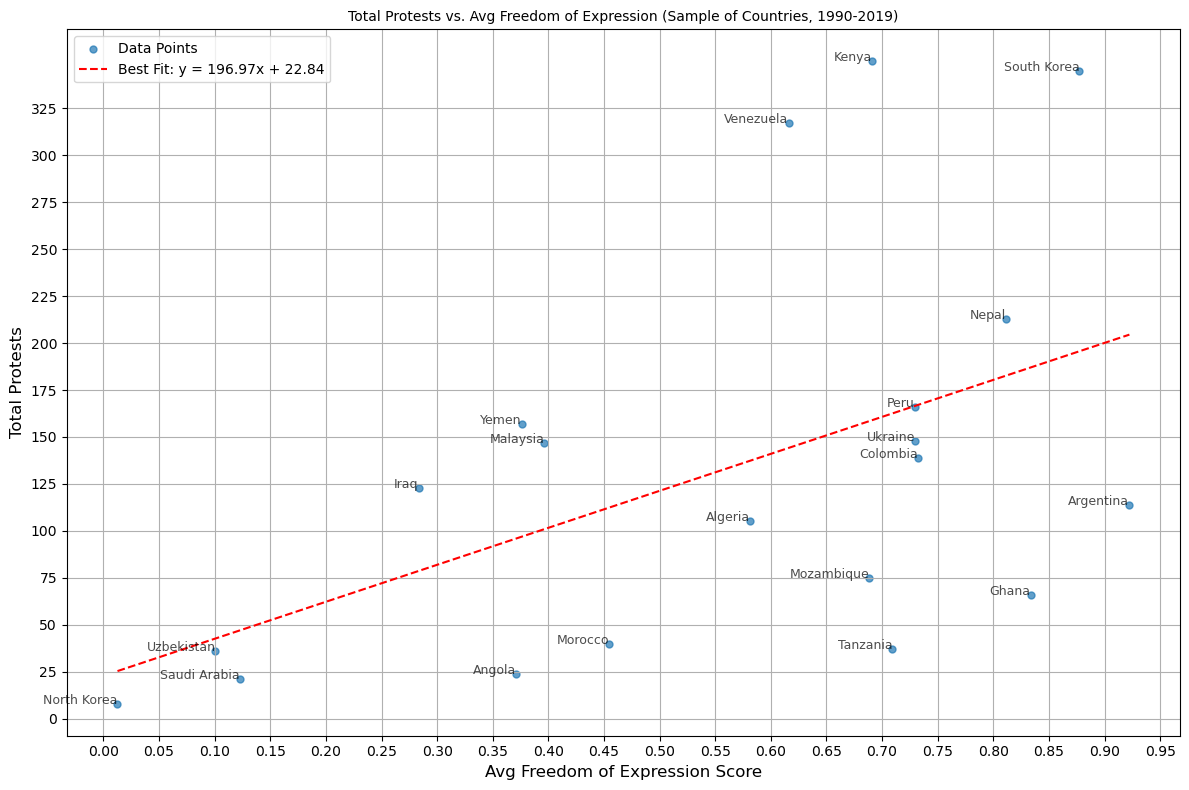

Pearson correlation coefficient: 0.5078381427393297


In [ ]:
x = combined_sample['avg_freedom_of_expression']
y = combined_sample['total_protests']

# Fit a linear regression line using NumPy's polyfit
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)

# Generate y values for the line of best fit
x_line = np.linspace(x.min(), x.max(), 100)
y_line = line(x_line)


plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Data Points', s=25, alpha=0.7)
plt.plot(x_line, y_line, color='red', linestyle='--', label=f'Best Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

# Add country names as labels on the scatter plot by iterating through the rows of the data frame.
# The matplotlib .text() function takes the x and y values as arguments, along with the corresponding country name, and adds a label. The 'ha=right' parameter aligns the text to the right, while 'alpha=0.7' makes the text more transparent for readability.
for i, row in combined_sample.iterrows():
    plt.text(row['avg_freedom_of_expression'], row['total_protests'], row['country_name'], fontsize=9, ha='right', alpha=0.7)

plt.title('Total Protests vs. Avg Freedom of Expression (Sample of Countries, 1990-2019)', fontsize=10)
plt.xlabel('Avg Freedom of Expression Score', fontsize=12)
plt.ylabel('Total Protests', fontsize=12)
plt.xticks(np.arange(0, 1, 0.05))
plt.yticks(np.arange(0,350,25))
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

corr = x.corr(y)
print(f"Pearson correlation coefficient: {corr}")

With a Pearson correlation coefficient of 0.51, we can establish that there is a moderate correlation between a country's freedom of expression score and the number of protests they experience. Freedom of Expression is notoriously limited in North Korea, and the low number of protests reflects this. Its Southern neighbour, South Korea, on the other hand, has a relatively high freedom of expression score, and its large number of protests reflects the ability of citizens to make their voices heard. Peru is the closest country in the sample to the best fit line, meaning that it's closest to the model we've created.

## Conclusion
The aim of this project was to examine the relationship between protest frequency and political freedoms in a sample of countries from 1990 to 2019. Our findings suggest that a country's freedom of expression score is positively correlated with the number of protests, particularly in more democratic nations. Conversely, in authoritarian regimes, such as Turkey, the decline in democratic values seems to lead to an increase in protests as a form of resistance.

Despite the interesting insights, the analysis was limited by the geographic scope and the temporal range of the data. Future studies could explore additional factors, such as economic conditions, or broaden the geographic focus to include more diverse regions. Overall, this study underscores the importance of political freedoms in shaping the likelihood and intensity of public protests, offering valuable insights for both policymakers and activists alike.

## Considerations/Improvements for Further Research
If conducting this research further, there are a number of improvements I would make to make the research more efficient and to get more meaningful results from my data.

### Incorporating SQLite3.
One challenge I came across with this project was the size of the V-dem dataset. Due to the sheer size of the CSV, I had to compress the file before working with it. This is one of the main reasons why using a database can be more efficient. Here is how I could incorporate this:

In [65]:
import sqlite3

vdem_path = "/Users/myleshenehan/Downloads/Correct-pfda/pfda/project/data/v-dem.csv.gz"
vdem_df = pd.read_csv(vdem_path, compression='gzip')

# When trying to run this, I got the error "OperationalError: too many columns on vdem scores". As such, I'd focus on the columns I need.
columns_to_keep = ['year', 'country_name', 'v2x_libdem', 'v2x_freexp']
vdem_df_subset = vdem_df[columns_to_keep]

# We can connect to SQLite and create the file vdem_data.db
conn = sqlite3.connect("vdem_data.db") 

# We can then save the data frame as a table in SQLite using the ".to_sql() function". 'Index=False prevents the DataFrame's index from being written as a separate column in the database.
vdem_df_subset.to_sql("vdem_scores", conn, if_exists="replace", index=False)

# Close the connection (commits changes and closes connection to SQLite)
conn.close()


/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_19582/911501765.py:4: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem_df = pd.read_csv(vdem_path, compression='gzip')


We can then run some SQL queries. Here are some examples:
1. SELECT * FROM vdem_scores; (to select all data from the vdem_scores table)
2. SELECT year, country, score FROM vdem_scores; (to select specific columns from the vdem_scores table)
3. SELECT * FROM vdem_scores WHERE country_name = 'Ireland'; (to filter by country "Ireland")
4. SELECT * FROM vdem_scores WHERE year = 2014; (to filter by year "2014")

Let's give it a try with the 3rd example.

In [66]:
conn = sqlite3.connect("vdem_data.db")
cursor = conn.cursor()

# Run a SQL query (e.g., selecting all records)
cursor.execute("SELECT * FROM vdem_scores WHERE country_name = 'Ireland'")

# Fetch and print the results
results = cursor.fetchall()
for row in results:
    print(row)

# Close the connection
conn.close()


(1919, 'Ireland', 0.233, 0.611)
(1920, 'Ireland', 0.234, 0.611)
(1921, 'Ireland', 0.32, 0.611)
(1922, 'Ireland', 0.452, 0.621)
(1923, 'Ireland', 0.523, 0.67)
(1924, 'Ireland', 0.606, 0.778)
(1925, 'Ireland', 0.61, 0.778)
(1926, 'Ireland', 0.613, 0.778)
(1927, 'Ireland', 0.618, 0.778)
(1928, 'Ireland', 0.63, 0.778)
(1929, 'Ireland', 0.633, 0.778)
(1930, 'Ireland', 0.633, 0.778)
(1931, 'Ireland', 0.633, 0.778)
(1932, 'Ireland', 0.642, 0.778)
(1933, 'Ireland', 0.643, 0.778)
(1934, 'Ireland', 0.643, 0.778)
(1935, 'Ireland', 0.647, 0.778)
(1936, 'Ireland', 0.654, 0.778)
(1937, 'Ireland', 0.655, 0.778)
(1938, 'Ireland', 0.647, 0.778)
(1939, 'Ireland', 0.633, 0.767)
(1940, 'Ireland', 0.633, 0.767)
(1941, 'Ireland', 0.633, 0.767)
(1942, 'Ireland', 0.633, 0.767)
(1943, 'Ireland', 0.636, 0.767)
(1944, 'Ireland', 0.639, 0.767)
(1945, 'Ireland', 0.642, 0.791)
(1946, 'Ireland', 0.659, 0.797)
(1947, 'Ireland', 0.659, 0.797)
(1948, 'Ireland', 0.654, 0.797)
(1949, 'Ireland', 0.664, 0.828)
(1950, 'Irel

### Introducing the HDI as a third data set